<a href="https://colab.research.google.com/github/Subashini004/Bicycle_Lane_Distribution/blob/main/Bicycle_Lane_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1: Install Required Libraries**

In [ ]:
!pip install -U googlemaps
!pip install osmnx
!pip install folium

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40714 sha256=31c72c1da189f8db0ef5d9c2feb65c5ac0e9865ee272271e6662917d1ca2ec7d
  Stored in directory: /root/.cache/pip/wheels/f1/09/77/3cc2f5659cbc62341b30f806aca2b25e6a26c351daa5b1f49a
Successfully built googlemaps
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 1.8 MB/s eta 0:00:00


# **STEP 2: Import Libraries**

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import seaborn as sns
from google.colab import drive


# **STEP 3: Visualize Bicycle Routes using OSMnx**

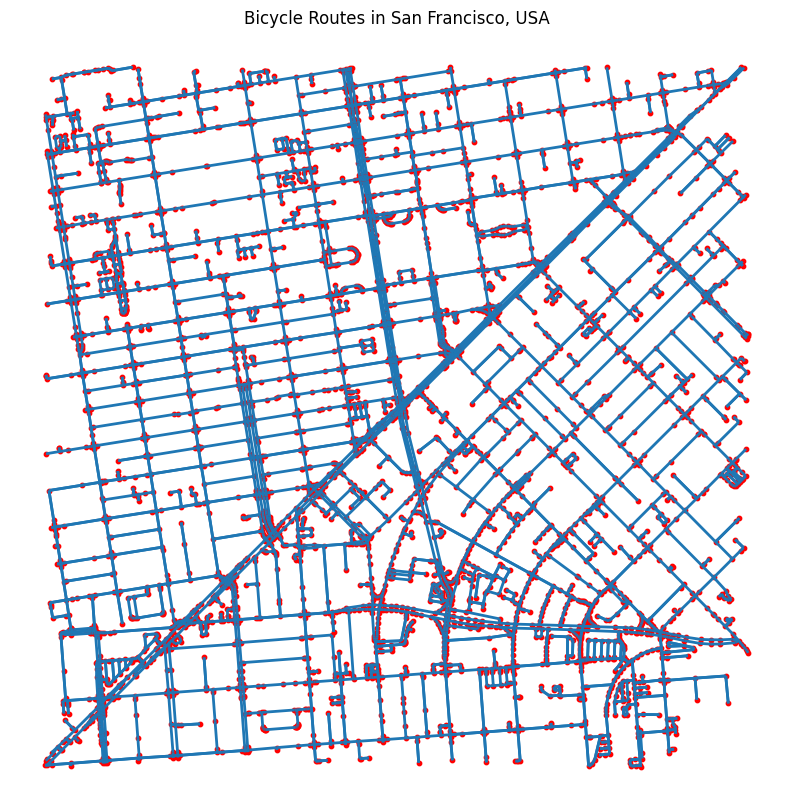

In [ ]:
# Coordinates for San Francisco
lat, lon = 37.7749, -122.4194

# Download bike network
G = ox.graph_from_point((lat, lon), dist=1000, network_type='bike', simplify=False)

# Convert graph to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G)

# Plot bike network
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=2, edgecolor='tab:blue')
nodes.plot(ax=ax, markersize=10, color='red')
plt.title('Bicycle Routes in San Francisco, USA')
plt.axis('off')
plt.show()


# **STEP 4: User Route Analysis (Bar + Pie Chart)**

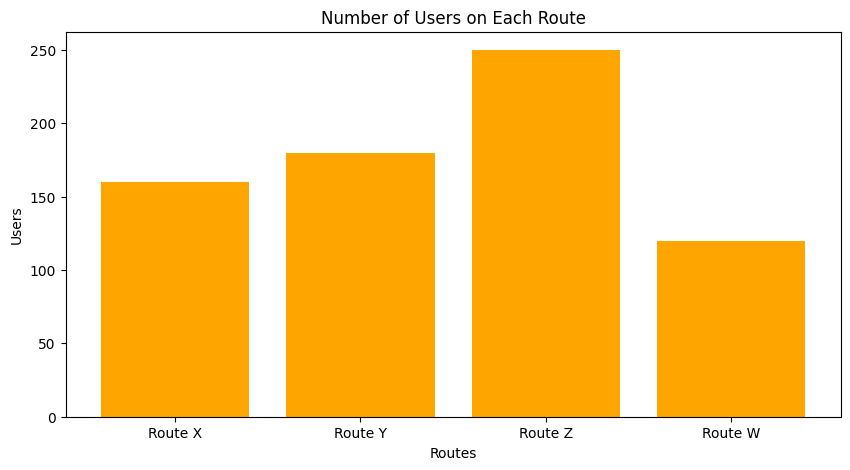

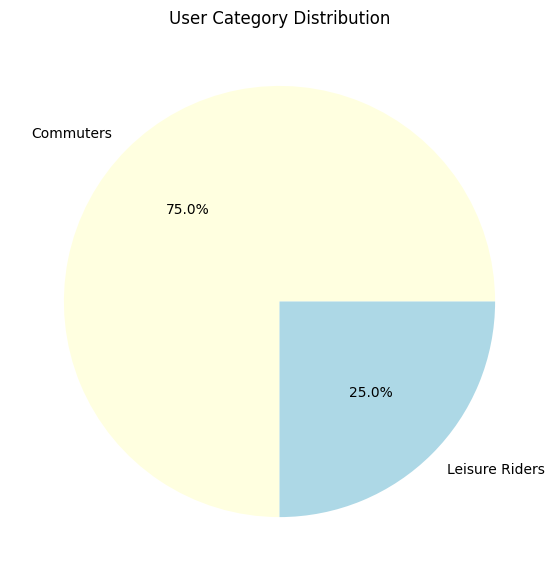

In [ ]:
# Sample data
routes = ['Route X', 'Route Y', 'Route Z', 'Route W']
user_counts = [160, 180, 250, 120]
user_types = ['Commuters', 'Leisure Riders', 'Commuters', 'Commuters']

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(routes, user_counts, color='orange')
plt.title("Number of Users on Each Route")
plt.xlabel("Routes")
plt.ylabel("Users")
plt.show()

# Pie chart
category_counts = pd.Series(user_types).value_counts()
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightyellow', 'lightblue'])
plt.title("User Category Distribution")
plt.show()


# **STEP 5: Visualize Restricted Areas with Folium**

In [ ]:
# Create folium map
m = folium.Map(location=[lat, lon], zoom_start=15)

# Restricted places
restricted_places = [
    {'name': 'Golden Gate Park', 'location': [37.7694, -122.4862]},
    {'name': 'Fisherman\'s Wharf', 'location': [37.8080, -122.4177]}
]

# Add markers
for place in restricted_places:
    folium.Marker(location=place['location'], popup=place['name'], icon=folium.Icon(color='red')).add_to(m)

m


# **STEP 6: Add Circle & Marker on Map**

In [ ]:
# Centered Map
m2 = folium.Map(location=[lat, lon], zoom_start=15)

# Add marker
folium.Marker([lat, lon], popup='San Francisco', icon=folium.Icon(color='blue')).add_to(m2)

# Add circle
folium.Circle(location=[lat, lon], radius=500, color='green', fill=True, fill_color='lightgreen').add_to(m2)

m2


# **STEP 7: Mount Google Drive and Load Dataset**

In [ ]:
# Mount drive
drive.mount('/content/drive', force_remount=True)

# Load CSV
file_path = '/content/RTA DATASET.csv'
data = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **STEP 8: Accident Data Visualization**

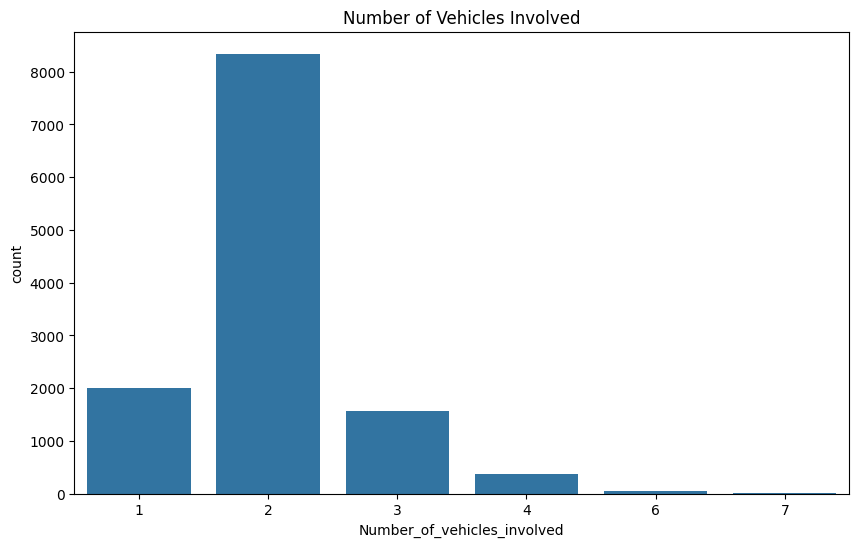

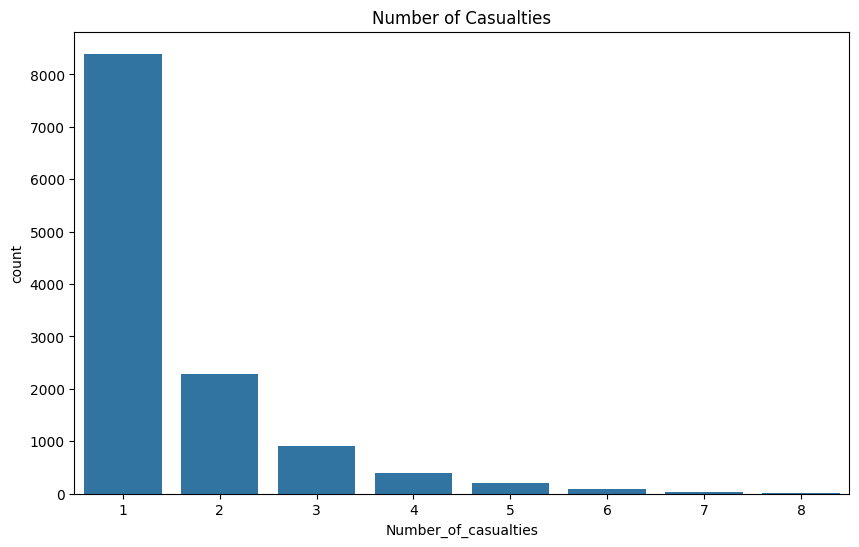

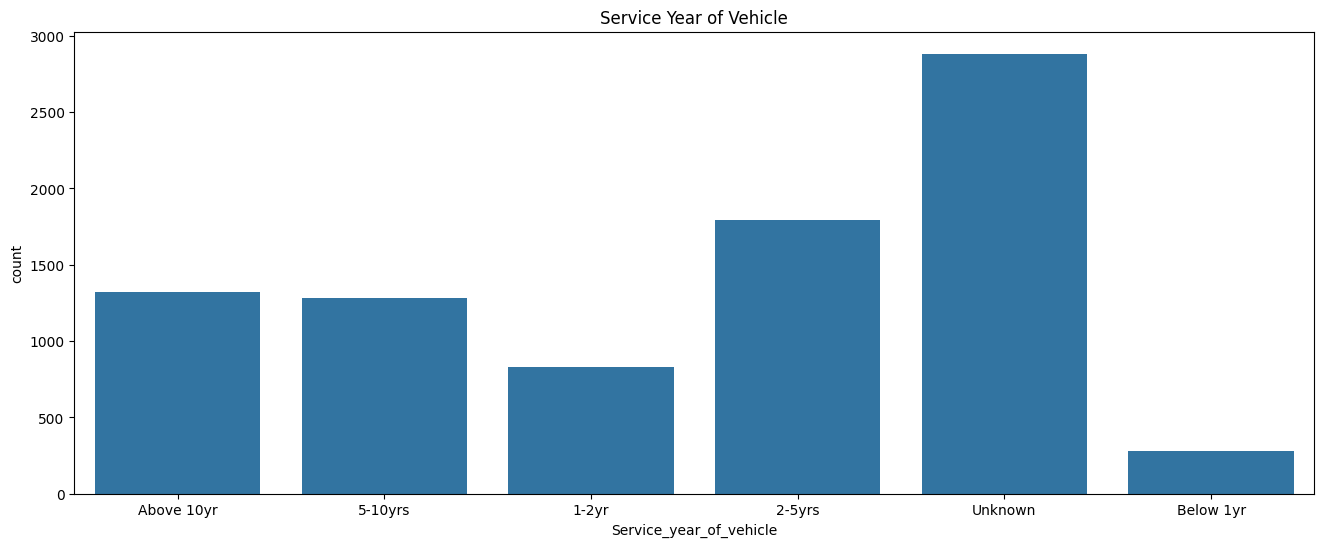

In [ ]:
# Countplots
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Number_of_vehicles_involved')
plt.title('Number of Vehicles Involved')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Number_of_casualties')
plt.title('Number of Casualties')
plt.show()

plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='Service_year_of_vehicle')
plt.title('Service Year of Vehicle')
plt.show()


# **STEP 9: Countplots with Category Mapping**

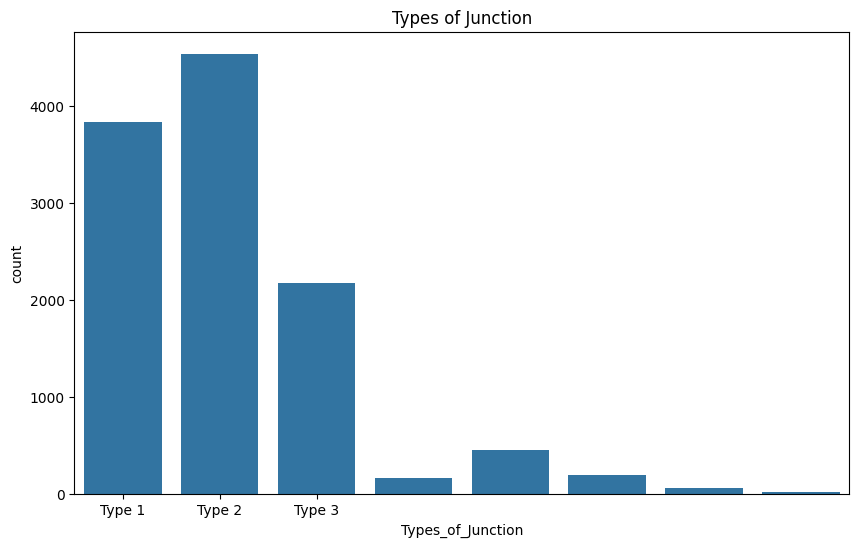

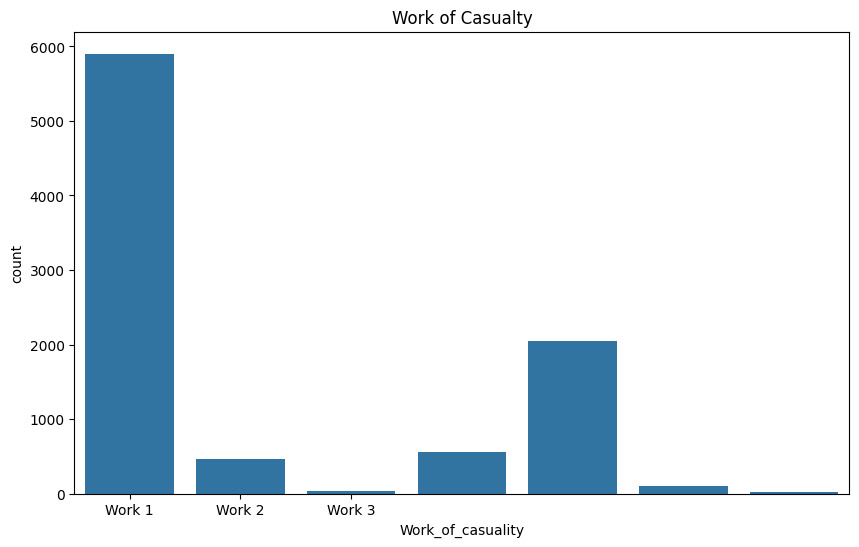

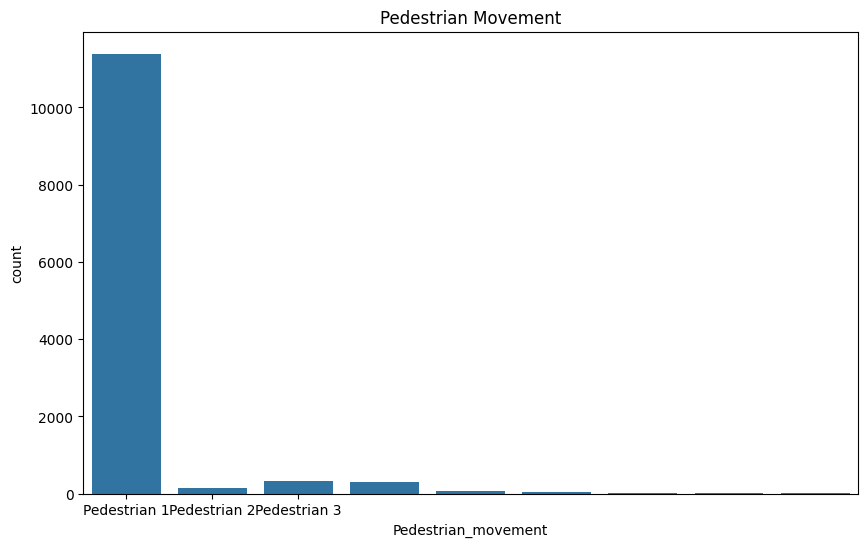

In [ ]:
# Define mappings
junction_map = {1: 'Type 1', 2: 'Type 2', 3: 'Type 3'}
work_map = {1: 'Work 1', 2: 'Work 2', 3: 'Work 3'}
pedestrian_map = {1: 'Pedestrian 1', 2: 'Pedestrian 2', 3: 'Pedestrian 3'}

# Update labels for plots
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Types_of_Junction')
plt.xticks(ticks=[0, 1, 2], labels=['Type 1', 'Type 2', 'Type 3'])
plt.title('Types of Junction')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Work_of_casuality')
plt.xticks(ticks=[0, 1, 2], labels=['Work 1', 'Work 2', 'Work 3'])
plt.title('Work of Casualty')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pedestrian_movement')
plt.xticks(ticks=[0, 1, 2], labels=['Pedestrian 1', 'Pedestrian 2', 'Pedestrian 3'])
plt.title('Pedestrian Movement')
plt.show()


# **STEP 10: Pair Plot & Correlation Heatmap**

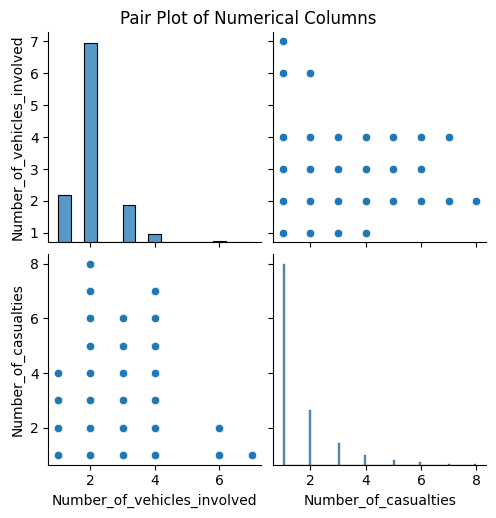

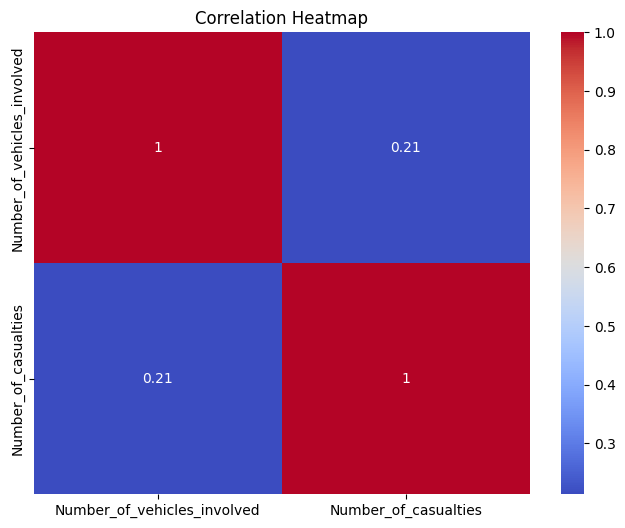

In [ ]:
# Select numerical columns
numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']

# Pair plot
sns.pairplot(data[numerical_cols])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

# Correlation heatmap
corr = data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()